## Layout Language Model

Layout Language models were introduced, inspired by the BERT model where input textual information is represented by text embeddings and position embeddings. 

LayoutLM further adds two types of input embeddings: 
1. a 2-D position embedding that denotes the relative position of a token within a document; 
2. an image embedding for scanned token images within a document. 

LayoutLM is the first model where text and layout are jointly learned in a single framework for document level pre-training. 

LayoutLM is a simple but effective multi-modal pre-training method of text, layout, and image for visually-rich document understanding and information extraction tasks, such as form understanding and receipt understanding. 

We have differnt versions of Layout LM like LayoutLM, LayoutLMv2 and LayoutLMv3 and all the models performs way better than the SOTA(State of the Art) Models results on multiple datasets. 

We can use the Layout language model from the transformers python module.

We can use the LayoutLMv3FeatureExtractor module to extract the features from the documents.
The features returned consists of three components. They are 

1. Words - Which contains the text data of the document
2. Boxes - Which the text boxes co-ordinates values.
3. Pixel Values - Pixel Values.

This model also uses the Tesseract engine and Tensorflow/Pytorch libraries in backend to run the models. 

Lets check the architecture of the Layout Language Model

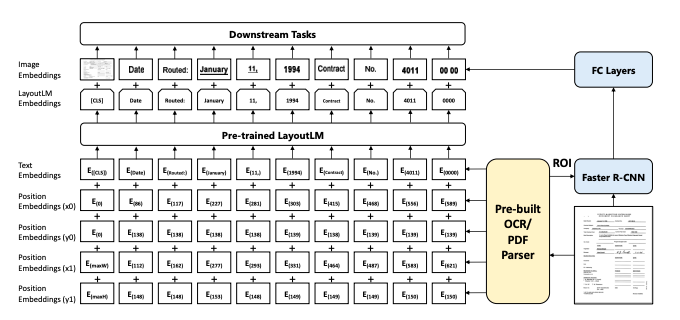

Lets try to run the model

Install the following requirements.

In [1]:
!pip3 install transformers
!pip3 install pytesseract
!pip install Pillow==9.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 13.6 MB/s 
     |████████████████████████████████| 182 kB 16.2 MB/s 
     |████████████████████████████████| 7.6 MB 9.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 15.1 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 13.5 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.3.0
    Uninstalling Pillow-9.3.0:
      Successfully uninstalled Pillow-9.3.0


Install teserract engine to the system.

In [1]:
!apt -qq install tesseract-ocr > /dev/null

Need the following command if we are trying to use teserract engine for telugu language predictions

In [ ]:
# !apt -qq install tesseract-ocr-tel > /dev/null

Import the necessary modules.

One of the important module is transformers which has inbuilt libraries of Layout Language Models

In [2]:
from pathlib import Path
from PIL import Image, ImageDraw
import numpy as np
from transformers import LayoutLMv3FeatureExtractor, LayoutLMv3TokenizerFast, LayoutLMv3Processor

I have stored my files in my Google Drive. So I need to mount the Drive to the colab notebook

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
ls "/content/drive/MyDrive/IUB Fall 22/Advance NLP/Project/data"


others/  resume_images/  wantok_images/


In [5]:
file_path = "/content/drive/MyDrive/IUB Fall 22/Advance NLP/Project/data"


We have google drive mounted and we can use the files to read. 

Lets load one image of wantok_images.

In [6]:
images_path = list(Path(file_path + "/wantok_images").glob("*"))

image = Image.open(images_path[0])

Lets check te size of the image

In [7]:
image.size

(1417, 1986)

Lets see the loaded image

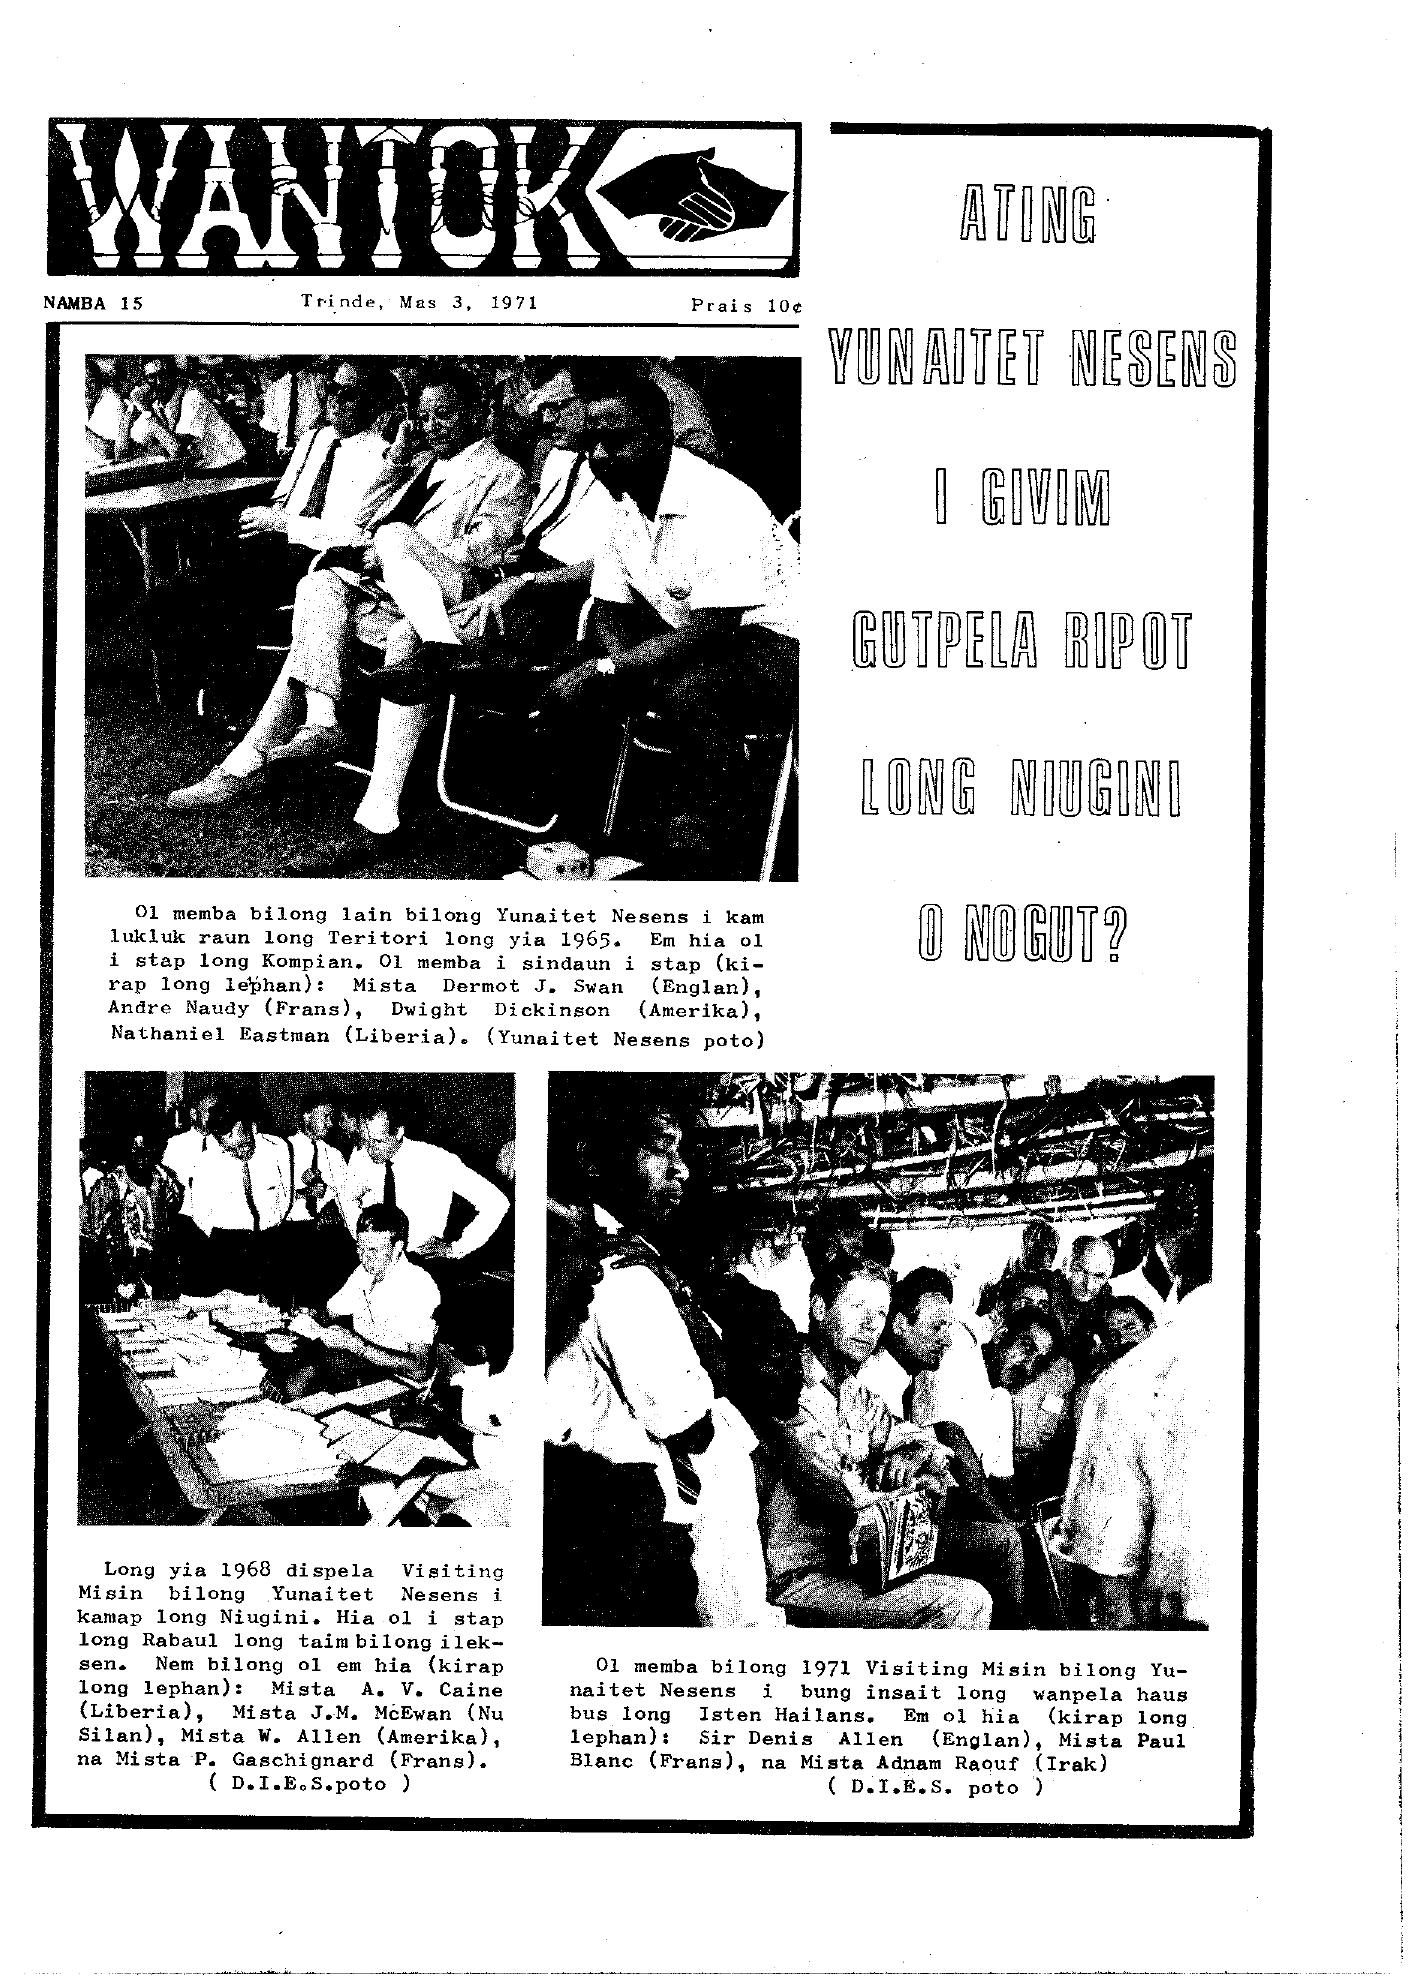

In [8]:
image

Now we have our image. Lets try to extract the features of the above image using LayoutLM FeatureExtractor

#### Feature Extraction : 

In [9]:
feature_extractor = LayoutLMv3FeatureExtractor(apply_ocr = True, ocr_lang='eng')

In [10]:
feature_extractor

LayoutLMv3ImageProcessor {
  "apply_ocr": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "LayoutLMv3ImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "ocr_lang": "eng",
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  },
  "tesseract_config": ""
}

In [11]:
features = feature_extractor(image)

In [12]:
features.keys()

dict_keys(['pixel_values', 'words', 'boxes'])

In [13]:
print(f"Words: {features['words'][0]}")
print(f"Boxes: {features['boxes'][0]}")
print(f"Image pixels: {features['pixel_values'][0].shape}")

Words: ['Long', 'yia', '1968', 'dispela', 'Visiting', 'Misin', 'bilong', 'Yunaitet', 'Nesens', 'i', 'kamap', 'long', 'Niugini.', 'Hia', 'ol', 'i', 'stap', 'long', 'Rabaul', 'long', 'taim', 'bilong', 'ilek-', 'sen.', 'Nem', 'bilong', 'ol', 'em', 'hia', '(kirap', 'long', 'lephan):', 'Mista', 'A.', 'V.', 'Caine', '(Liberia),', 'Mista', 'J.M.', 'McEwan', '(Nu', 'Silan),', 'Mista', 'W.', 'Allen', '(Amerika),', 'na', 'Mista', 'P.', 'Gaschignard', '(Frans).', '(', 'D.I.E.S.poto', ')', 'Trinde,', 'Mas', '3,', '1971', '©1', 'memba', 'bilong', 'lain', 'bilong', 'Yunaitet', 'Nesens', 'i', 'kam', 'lukluk', 'raun', 'long', 'Teritori', 'long', 'yia', '1965.', 'Em', 'hia', 'ol', 'i', 'stap', 'long', 'Kompian.', '01', 'memba', 'i', 'sindaun', 'i', 'stap', '(ki-', 'rap', 'long', 'lephan):', 'Mista', 'Dermot', 'J.', 'Andre', 'Naudy', '(Frans),', 'Dwight', 'Dickinson', '(Amerika),', 'Nathaniel', 'Eastman', '(Liberia).', '(Yunaitet', 'Nesens', 'poto)', 'Swan', '(Englan),', '01', 'memba', 'bilong', '1971',

From above output we can see some words are predicted. Let's concat all the words see the entire text

In [14]:
predicted_ocr = ""
for word in features['words'][0]:
    predicted_ocr += word + " "

Let's see the predicted ocr

In [15]:
predicted_ocr

'Long yia 1968 dispela Visiting Misin bilong Yunaitet Nesens i kamap long Niugini. Hia ol i stap long Rabaul long taim bilong ilek- sen. Nem bilong ol em hia (kirap long lephan): Mista A. V. Caine (Liberia), Mista J.M. McEwan (Nu Silan), Mista W. Allen (Amerika), na Mista P. Gaschignard (Frans). ( D.I.E.S.poto ) Trinde, Mas 3, 1971 ©1 memba bilong lain bilong Yunaitet Nesens i kam lukluk raun long Teritori long yia 1965. Em hia ol i stap long Kompian. 01 memba i sindaun i stap (ki- rap long lephan): Mista Dermot J. Andre Naudy (Frans), Dwight Dickinson (Amerika), Nathaniel Eastman (Liberia). (Yunaitet Nesens poto) Swan (Englan), 01 memba bilong 1971 Visiting Misin bilong Yu- naitet Nesens i bung insait long bus long Isten Hailans. Em ol hia lephan}: Sir Denis Allen (Englan), Mista Paul Blanc (Frans), na Mista Adnam Raouf (Irak) ( D.I.E.S. poto ) wanpela haus (kirap long '

From above we can see some text got extracted from the image.

Now lets try to plot the boundary boxes of these text

#### Boundary Boxes : 

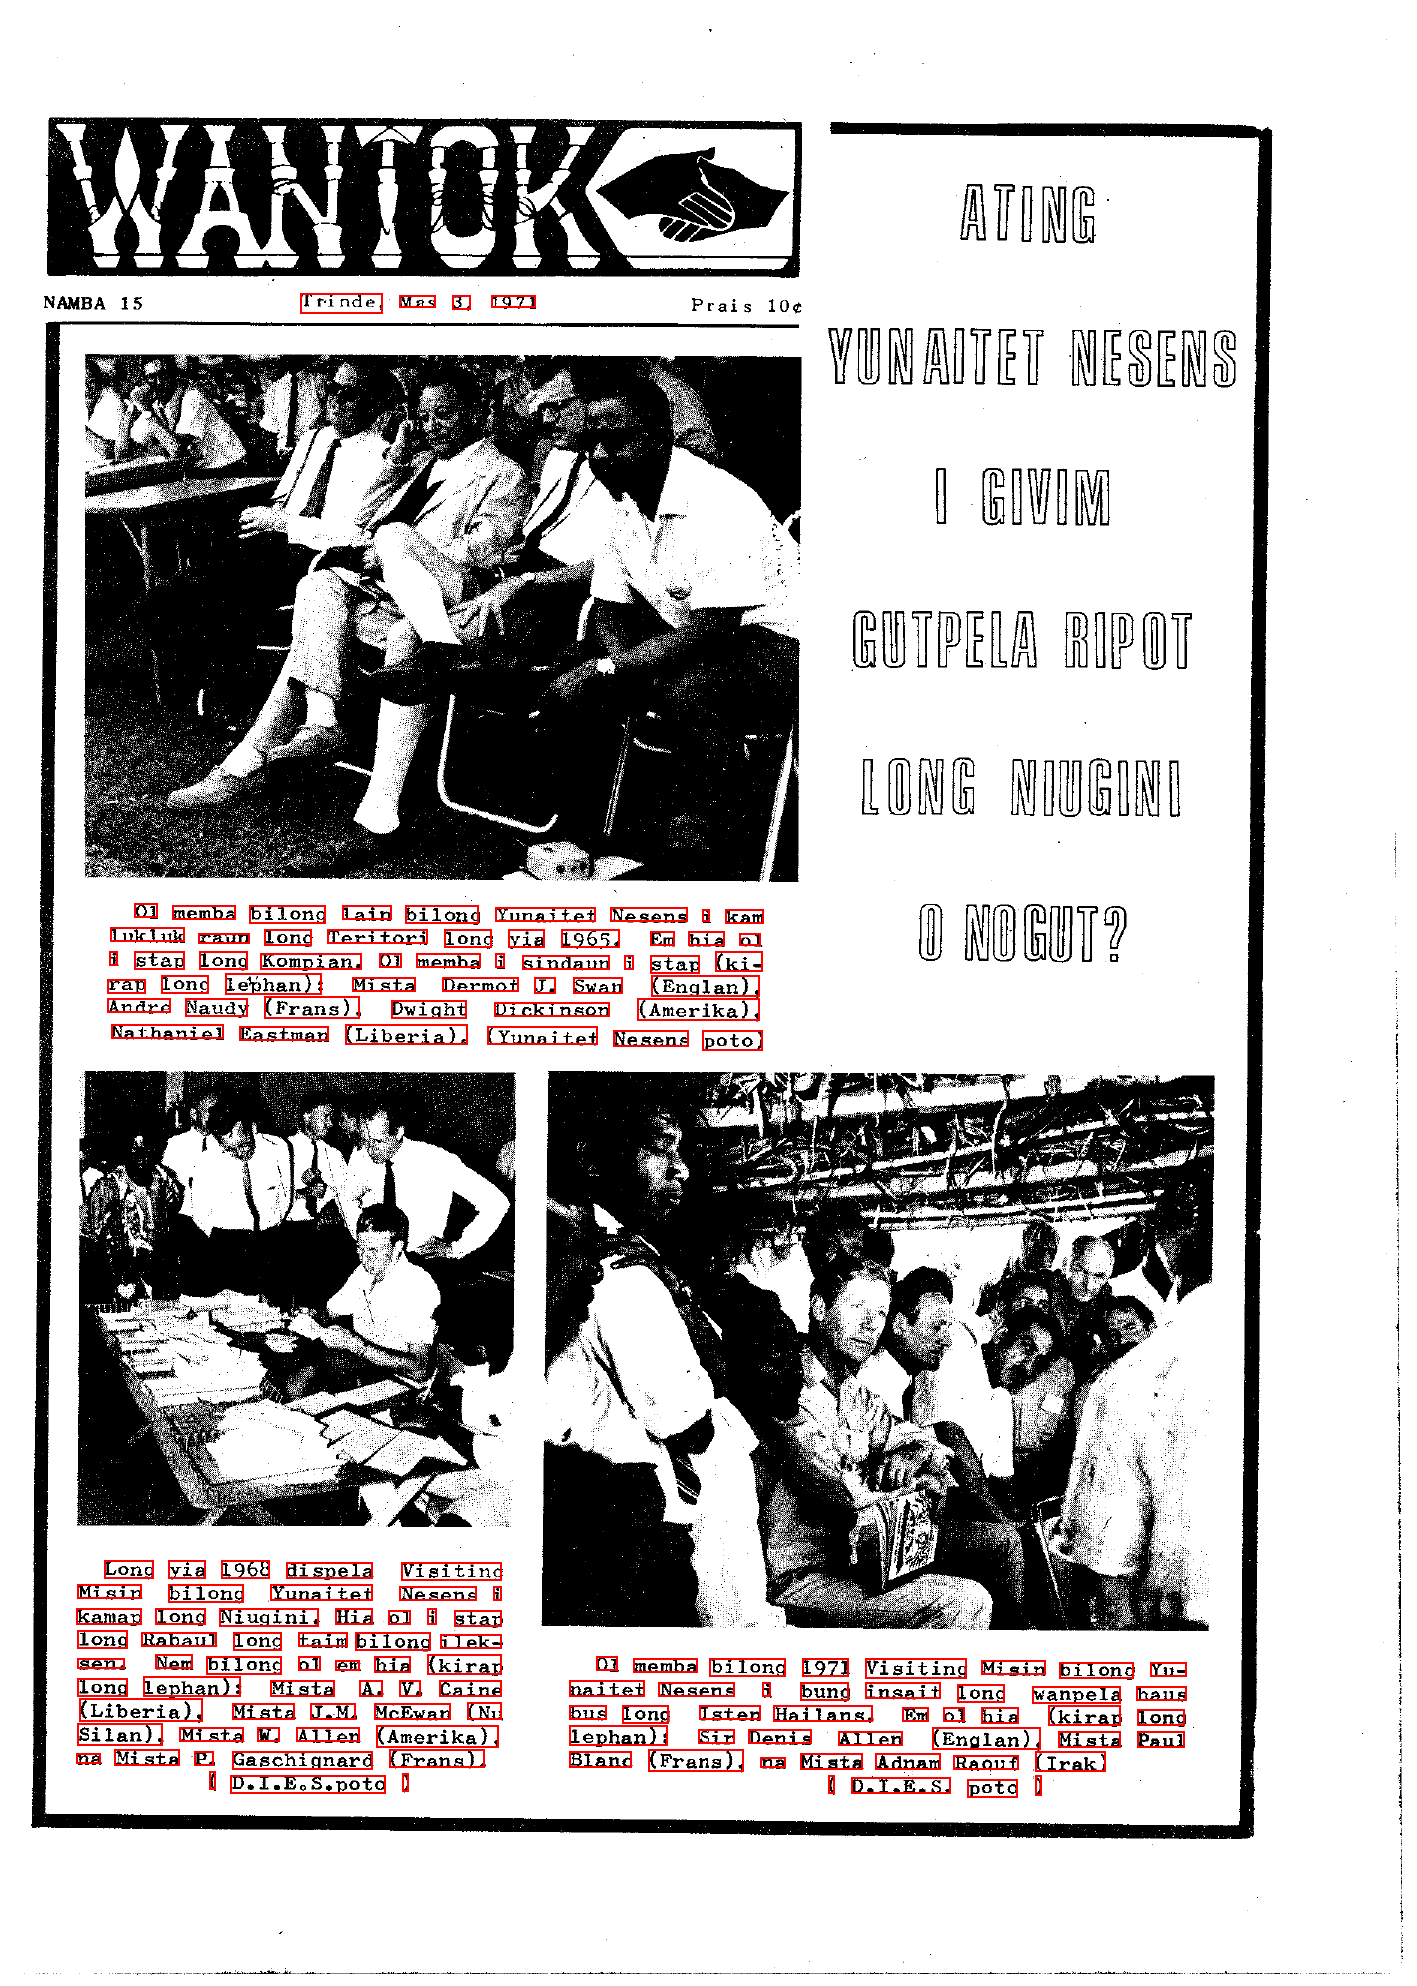

In [16]:
image = Image.open(images_path[0])

draw = ImageDraw.Draw(image)

width_scale = image.width/1000
height_scale = image.height/1000

for boundary_box in features['boxes'][0]:
  draw.rectangle([boundary_box[0] * width_scale, boundary_box[1] * height_scale,
                  boundary_box[2] * width_scale, boundary_box[3]* height_scale],
                 outline = 'red', width=2)
image

From above output we can clearly see the boxes around the text.

Now lets check other ways to extract the text from the same image

## PADDLE OCR

Paddle OCR is one of the open source library which is practical ultra-lightweight pre-trained model, support training and deployment among server, mobile, embedded and IoT devices.

Paddle OCR is mainly designed and trained on recognising the Chinese and English character recognition. But the proposed model is also verified in several language recognition tasks like French, Korean, Japanese and German.

As mentioned it is very light weighted and can be used with or without GPU. It returns the three output components which are 

1. Text detection
2. Detected Boxes 
3. Text recognition

In [17]:
!python3 -m pip install paddlepaddle-gpu==2.1.3.post112 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
     |████████████████████████████████| 349.8 MB 975 bytes/s 


In [18]:
!pip install "paddleocr>=2.0.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 411 kB 14.9 MB/s 
     |████████████████████████████████| 965 kB 71.4 MB/s 
     |████████████████████████████████| 5.6 MB 62.4 MB/s 
     |████████████████████████████████| 619 kB 72.1 MB/s 
     |████████████████████████████████| 87 kB 5.8 MB/s 
     |████████████████████████████████| 2.2 MB 63.1 MB/s 
     |████████████████████████████████| 4.9 MB 64.1 MB/s 
     |████████████████████████████████| 8.8 MB 25.8 MB/s 
     |████████████████████████████████| 148 kB 81.1 MB/s 
     |████████████████████████████████| 399 kB 64.0 MB/s 
     |████████████████████████████████| 204 kB 79.9 MB/s 
     |████████████████████████████████| 132 kB 81.8 MB/s 
     |████████████████████████████████| 2.3 MB 56.9 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943 sha256=d85423d86738210785546d0379f6a93993bdba3d194acfe1260c74074c9578e

Once all the requirements are installed lets create the PaddleOCR API object

In [1]:
from paddleocr import PaddleOCR, draw_ocr


ocr = PaddleOCR(use_angle_cls=True, lang='en') 

[2022/12/07 23:53:15] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set

As we are using google colab, it doesn't support the cv2 module directly. So I need to import proper package.

Also as I mentioned i stored my files in Google Drive I need to mount Google Drive.

In [2]:
from google.colab.patches import cv2_imshow
import cv2

In [3]:
from pathlib import Path
from PIL import Image, ImageDraw
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
ls "/content/drive/MyDrive/IUB Fall 22/Advance NLP/Project/data"


others/  resume_images/  wantok_images/


In [5]:
file_path = "/content/drive/MyDrive/IUB Fall 22/Advance NLP/Project/data"


In [6]:
images_path = list(Path(file_path + "/wantok_images").glob("*"))

image = Image.open(images_path[0])

In [7]:
print(str(images_path[0]))

/content/drive/MyDrive/IUB Fall 22/Advance NLP/Project/data/wantok_images/Wantok_namba_15_page-0001.jpg


We have mounted google drive and got the files from drive. 

Lets load one image and view once.

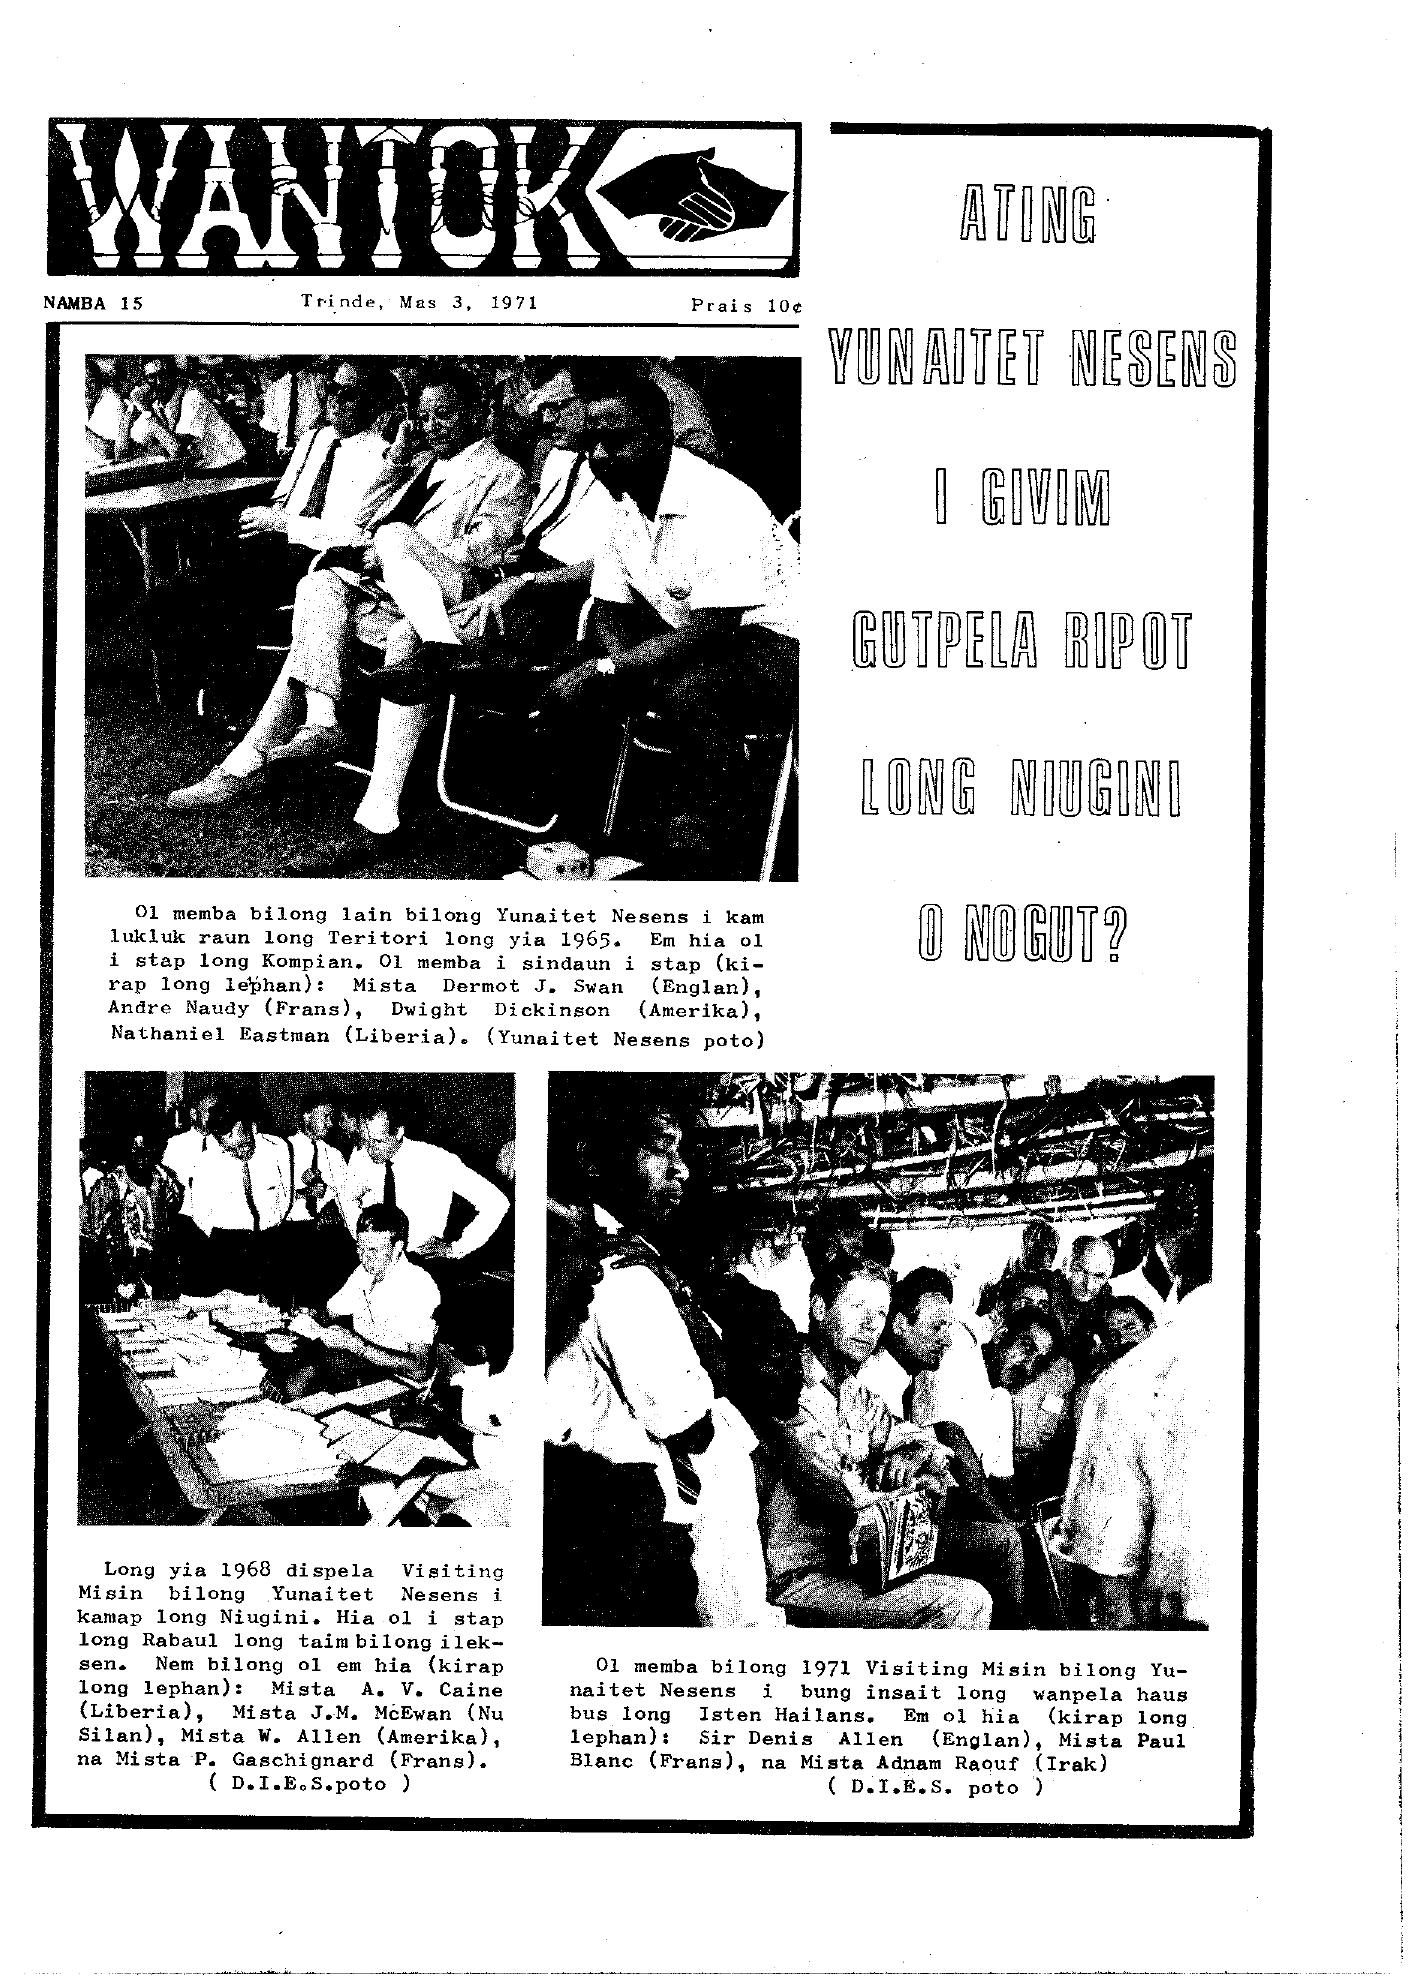

In [8]:
img_path = str(images_path[0])

img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

We can view the image clearly. Now lets try to extract the text from this image.

We have to use the OCR package to read the image and extract the text 

In [9]:
# %timeit result = ocr.ocr(img_path, cls=True)
result = ocr.ocr(img_path, cls=True)

[2022/12/07 23:53:25] ppocr DEBUG: dt_boxes num : 37, elapse : 5.290798187255859
[2022/12/07 23:53:25] ppocr DEBUG: cls num  : 37, elapse : 0.14812207221984863
[2022/12/07 23:53:25] ppocr DEBUG: rec_res num  : 37, elapse : 0.18934869766235352


Now we got the result from the OCR. Lets try to print the each line from the result

In [10]:
for line in result[0]:
    print(line)

[[[63.0, 130.0], [641.0, 130.0], [641.0, 267.0], [63.0, 267.0]], ('WANTUK', 0.8914305567741394)]
[[[41.0, 289.0], [144.0, 294.0], [143.0, 317.0], [40.0, 312.0]], ('NAMBA 15', 0.9962493181228638)]
[[[295.0, 287.0], [540.0, 290.0], [540.0, 312.0], [295.0, 310.0]], ('Trinde, Mas 3, 1971', 0.9390543699264526)]
[[[686.0, 292.0], [806.0, 294.0], [805.0, 317.0], [685.0, 314.0]], ('Prais 10c', 0.9112671613693237)]
[[[838.0, 323.0], [1230.0, 327.0], [1229.0, 385.0], [837.0, 380.0]], ('TUNAITET NESENS', 0.8078736066818237)]
[[[129.0, 898.0], [770.0, 904.0], [769.0, 931.0], [129.0, 925.0]], ('Ol memba bilong lain bilong Yunaitet Nesens i kam', 0.9855824708938599)]
[[[103.0, 921.0], [768.0, 925.0], [767.0, 954.0], [103.0, 950.0]], ('lukluk raun long Teritori long yia i965. Em hia ol', 0.9799408912658691)]
[[[103.0, 945.0], [768.0, 950.0], [767.0, 979.0], [103.0, 974.0]], ('i stap long Kompian. Ol memba i sindaun i stap (ki-', 0.9804458022117615)]
[[[103.0, 970.0], [635.0, 972.0], [635.0, 999.0], [

Now lets see the entire concatenated text 

In [11]:
predicted_text = ""
for line in result[0]:
    print(line[1][0])
    predicted_text += line[1][0]
with open("ocr_predicted.txt", "w") as file:
    file.write(predicted_text)
print(predicted_text)

WANTUK
NAMBA 15
Trinde, Mas 3, 1971
Prais 10c
TUNAITET NESENS
Ol memba bilong lain bilong Yunaitet Nesens i kam
lukluk raun long Teritori long yia i965. Em hia ol
i stap long Kompian. Ol memba i sindaun i stap (ki-
rap long lephan): Mista Dermot J. Swan
(Englan),
Andre Naudy (Frans),
Dwight
Dickinson
(Amerika),
Nathaniel Eastman (Liberia). (Yunaitet Nesens poto)
Long yia 1968 dispela
Visiting
Misin bilong Yunaitet
 Nesens i
kamap long Niugini. Hia ol i stap
long Rabaul long taim bilong ilek-
sen.
Ol memba bilong I97l Visiting Misin biIong Yu-
long lephan):
Mista
A. V. Caine
naitet Nesens i bung insait long wanpela haus
(Liberia), Mista J.M. McEwan (Nu
bus iong
 Isten Hailans. Em ol hia
(kirap long
Silan), Mista W. Allen (Amerika),
lephan):
na Mista P. Gaschignard (Frans).
Blanc (Frans), na Mista Adnam Raouf (Irak)
( D.I.E.S.poto )
( D.I.E.S. poto )
WANTUKNAMBA 15Trinde, Mas 3, 1971Prais 10cTUNAITET NESENSOl memba bilong lain bilong Yunaitet Nesens i kamlukluk raun long Teritori long yi

From above output cell we can see the extracted text.

Now lets try to plot the boxes around the text.

In [12]:
# draw result
from PIL import Image, ImageDraw, ImageFont
image = Image.open(img_path).convert('RGB')

boxes = [line[0] for line in result[0]]
txts = [line[1][0] for line in result[0]]
scores = [line[1][1] for line in result[0]]
font = ImageFont.load_default()
print(scores)
print(len(boxes))
im_show = draw_ocr(image, boxes, txts, scores,font_path='/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf' )
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')

[0.8914305567741394, 0.9962493181228638, 0.9390543699264526, 0.9112671613693237, 0.8078736066818237, 0.9855824708938599, 0.9799408912658691, 0.9804458022117615, 0.9864988923072815, 0.9901745319366455, 0.9781529307365417, 0.9990332126617432, 0.9994150996208191, 0.9789139032363892, 0.9933131337165833, 0.9927085041999817, 0.9984325170516968, 0.9978932738304138, 0.8945876359939575, 0.960042417049408, 0.9953529238700867, 0.9954148530960083, 0.9729275703430176, 0.983543336391449, 0.9976465106010437, 0.9549927115440369, 0.993631899356842, 0.9585366249084473, 0.93471360206604, 0.9801034331321716, 0.9977756142616272, 0.9812512397766113, 0.9847099184989929, 0.9989610910415649, 0.9828816652297974, 0.9483118057250977, 0.8332781195640564]
37


Lets see the output image

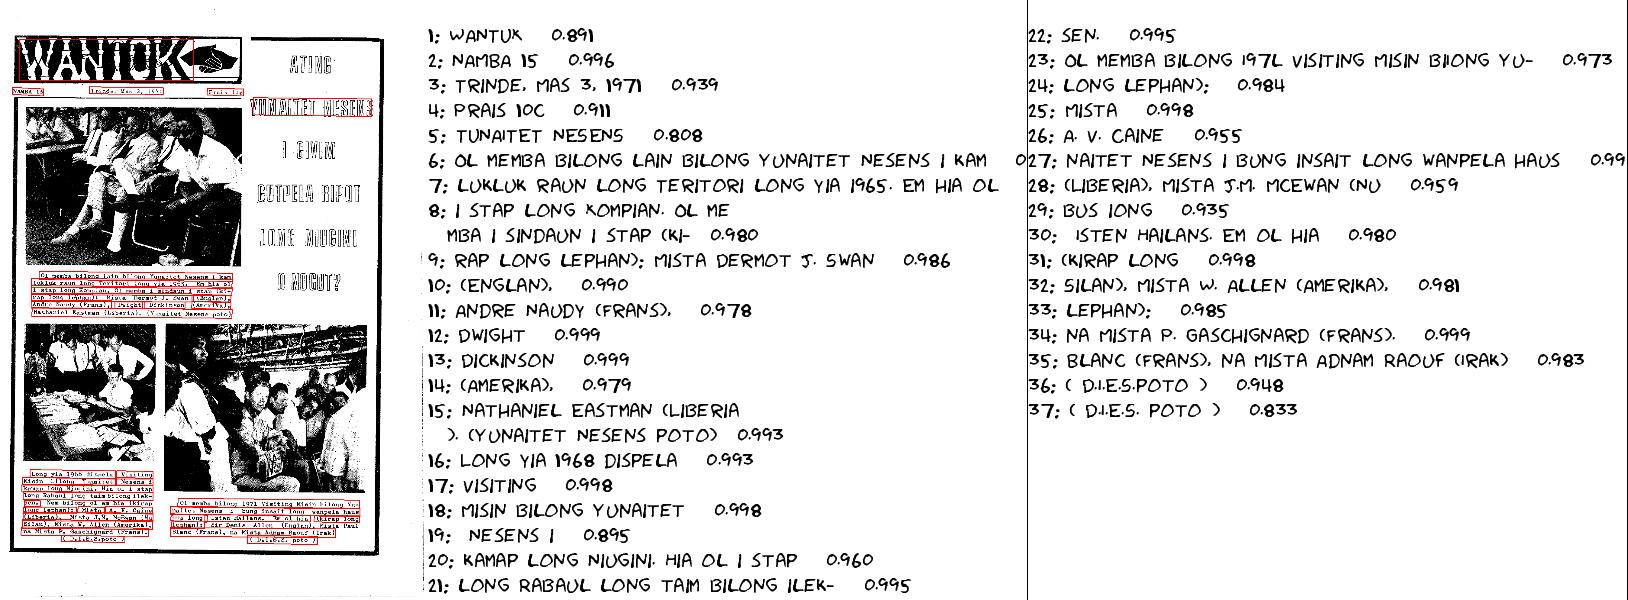

In [13]:
img = cv2.imread('/content/result.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

From above image we can clearly see that the text is extracted from the image and also we can see the boundary boxes. In addition, it is also giving the each word and its score so that how accurate the word is.

The below few cells are some benchmarks files. I have run the paddleocr on my Resume to see the results more accurate.

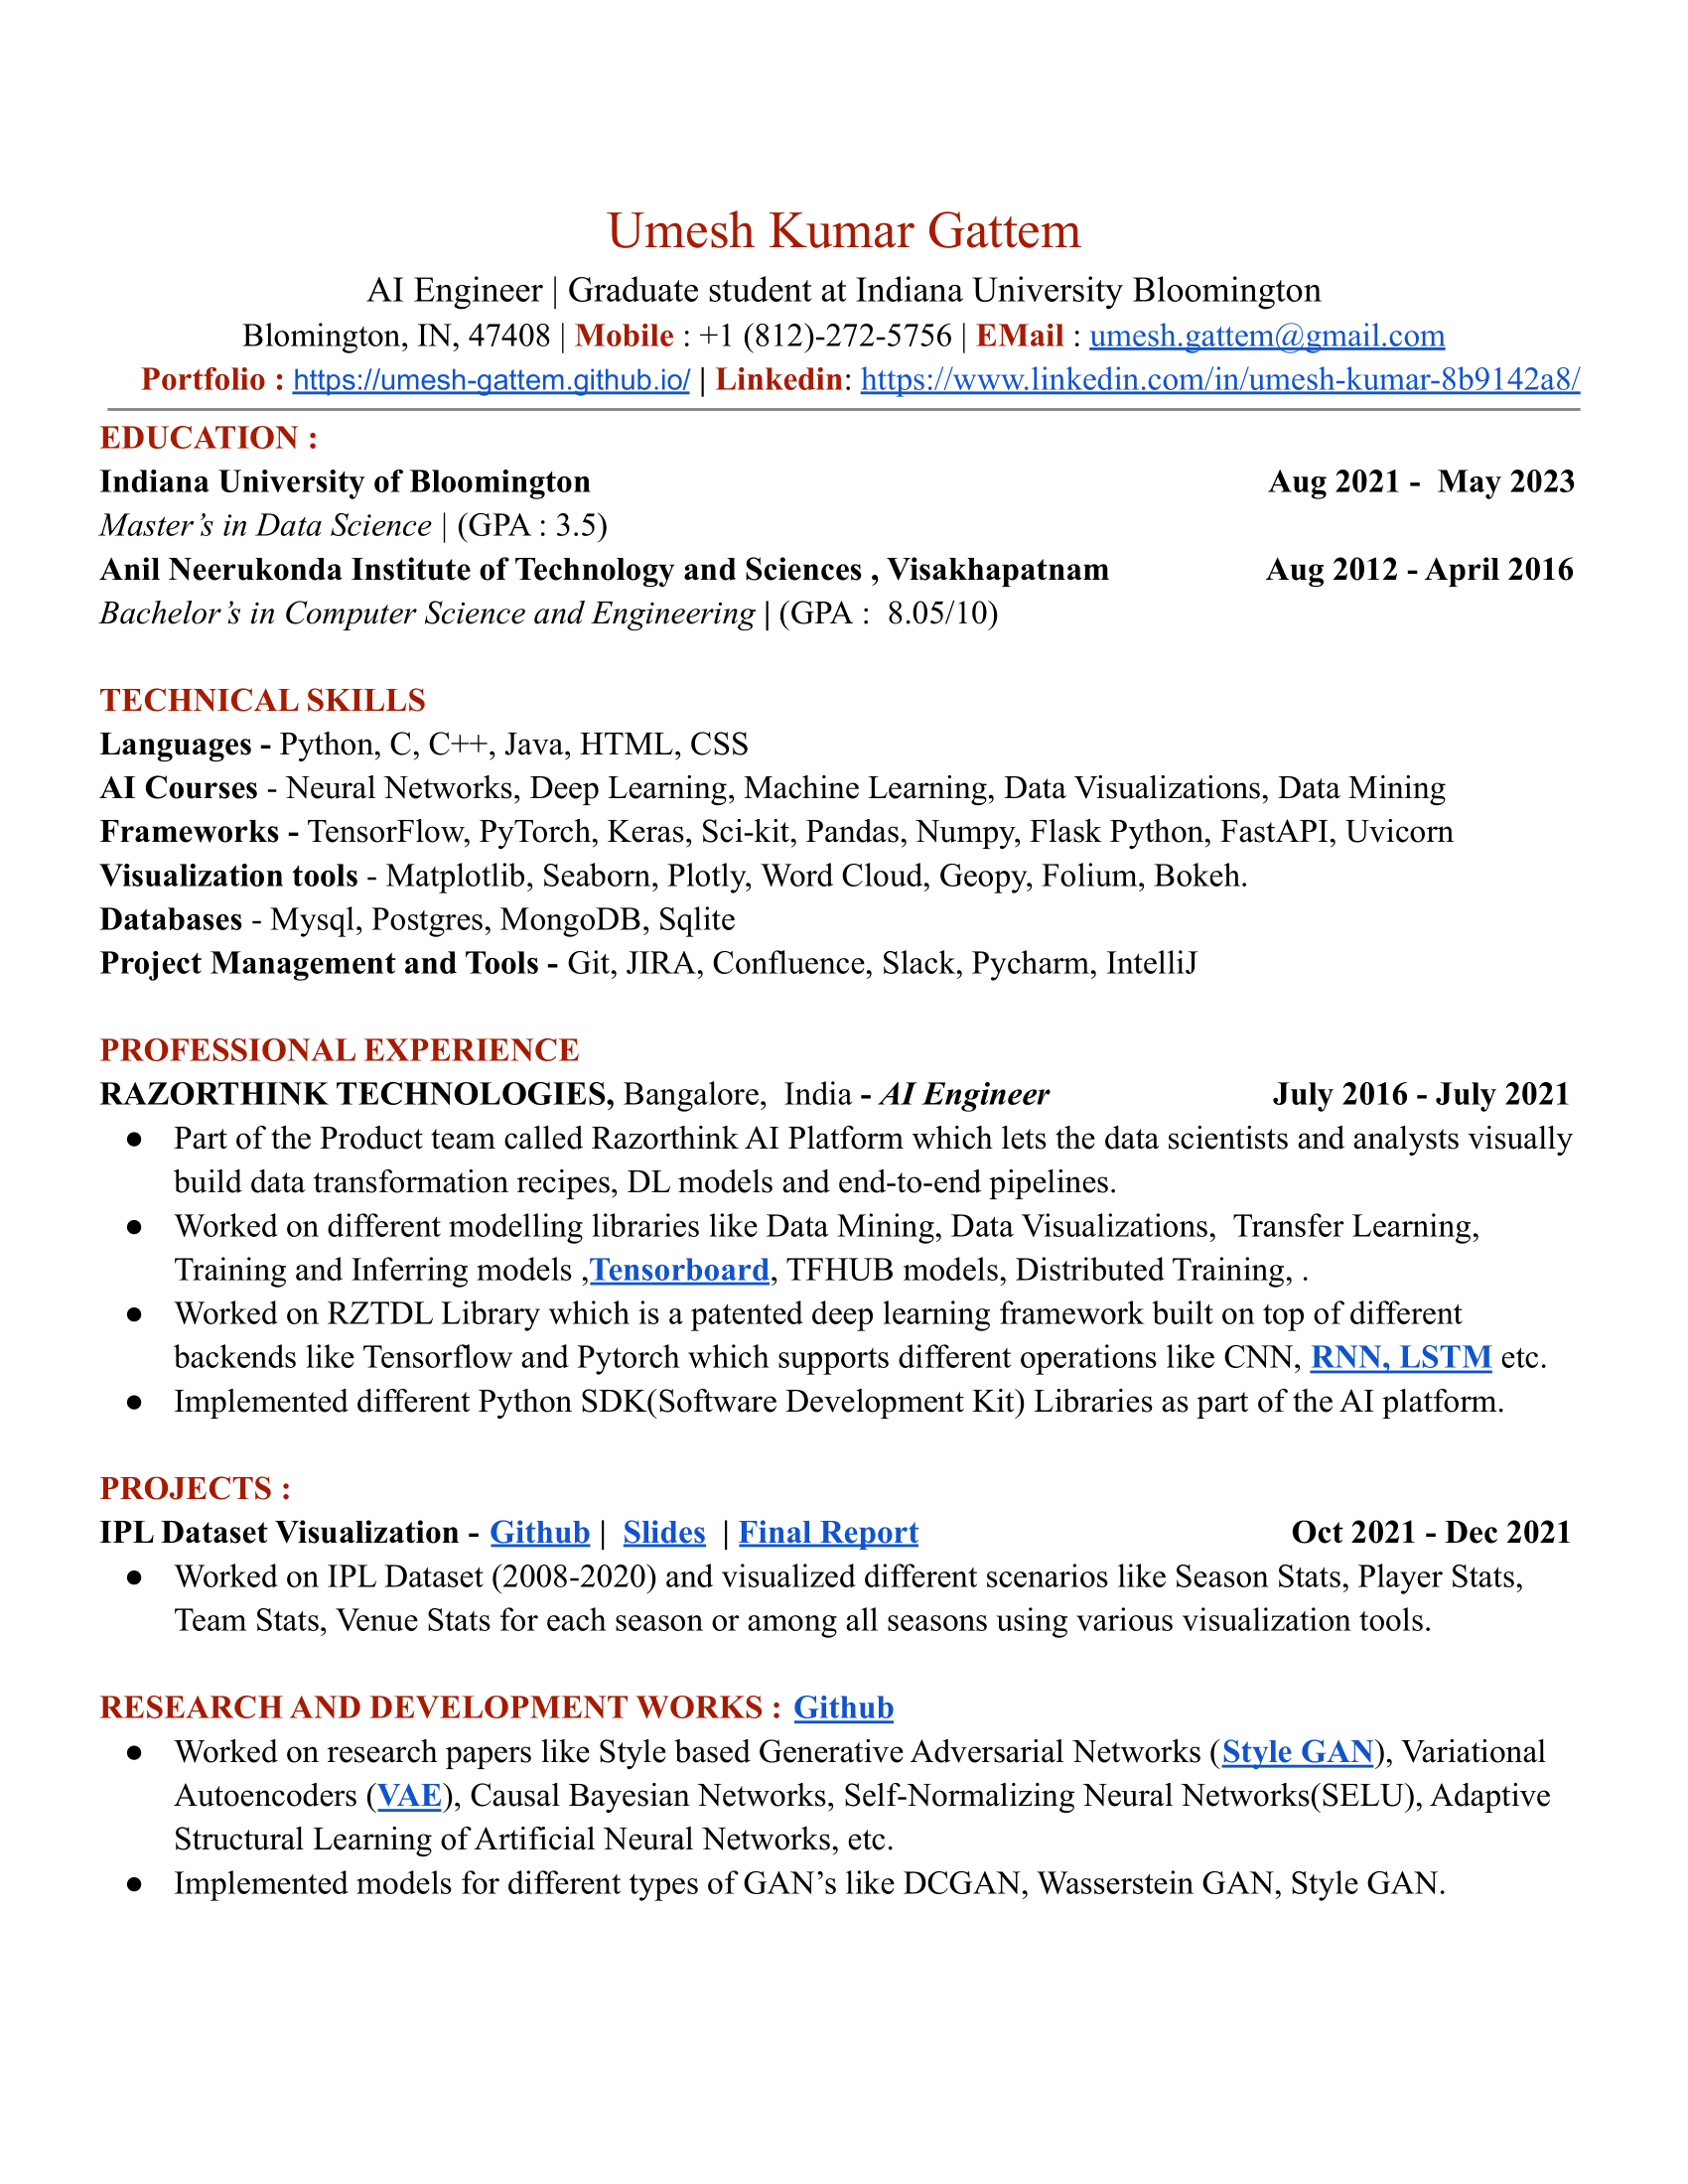

In [14]:
img_path = '/content/resume.png'

img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [15]:
# %timeit result = ocr.ocr(img_path, cls=True)
result = ocr.ocr(img_path, cls=True)

[2022/12/08 00:00:34] ppocr DEBUG: dt_boxes num : 40, elapse : 0.09183430671691895
[2022/12/08 00:00:34] ppocr DEBUG: cls num  : 40, elapse : 0.07754826545715332
[2022/12/08 00:00:34] ppocr DEBUG: rec_res num  : 40, elapse : 0.3118305206298828


In [16]:
for line in result[0]:
    print(line)

[[[614.0, 213.0], [1088.0, 213.0], [1088.0, 252.0], [614.0, 252.0]], ('Umesh Kumar Gattem', 0.9807722568511963)]
[[[370.0, 277.0], [1333.0, 277.0], [1333.0, 309.0], [370.0, 309.0]], ('AI Engineer | Graduate student at Indiana University Bloomington', 0.9907920360565186)]
[[[245.0, 323.0], [1455.0, 323.0], [1455.0, 353.0], [245.0, 353.0]], ('Blomington, IN, 47408 |Mobile : +1 (812)-272-5756 |EMail : umesh.gattem@gmail.com', 0.9905869364738464)]
[[[143.0, 367.0], [1589.0, 367.0], [1589.0, 399.0], [143.0, 399.0]], ('Portfolio : https://umesh-gattem.github.iol | Linkedin: https://www.linkedin.com/in/umesh-kumar-8b9142a8/', 0.9889769554138184)]
[[[102.0, 424.0], [323.0, 424.0], [323.0, 456.0], [102.0, 456.0]], ('EDUCATION :', 0.9960023760795593)]
[[[99.0, 470.0], [596.0, 470.0], [596.0, 502.0], [99.0, 502.0]], ('Indiana University of Bloomington', 0.9906994104385376)]
[[[1280.0, 470.0], [1587.0, 470.0], [1587.0, 502.0], [1280.0, 502.0]], ('Aug 2021 - May 2023', 0.9983083009719849)]
[[[99.0,

In [17]:
# draw result
from PIL import Image, ImageDraw, ImageFont
image = Image.open(img_path).convert('RGB')

boxes = [line[0] for line in result[0]]
txts = [line[1][0] for line in result[0]]
scores = [line[1][1] for line in result[0]]
font = ImageFont.load_default()
print(scores)
print(len(boxes))
im_show = draw_ocr(image, boxes, txts, scores,font_path='/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf' )
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')

[0.9807722568511963, 0.9907920360565186, 0.9905869364738464, 0.9889769554138184, 0.9960023760795593, 0.9906994104385376, 0.9983083009719849, 0.9688986539840698, 0.9901943206787109, 0.9949930906295776, 0.9746212363243103, 0.999392569065094, 0.9921110272407532, 0.9950522184371948, 0.9903169870376587, 0.9906477928161621, 0.9962514638900757, 0.998393714427948, 0.9987578392028809, 0.984175443649292, 0.9995238780975342, 0.9818212389945984, 0.9923768043518066, 0.9865124821662903, 0.991465151309967, 0.9956429600715637, 0.9910761713981628, 0.9935489892959595, 0.9993253946304321, 0.9742147326469421, 0.9925193786621094, 0.9838525652885437, 0.9894545674324036, 0.9899471998214722, 0.9793515801429749, 0.992547869682312, 0.9810876250267029, 0.9830083847045898]
38


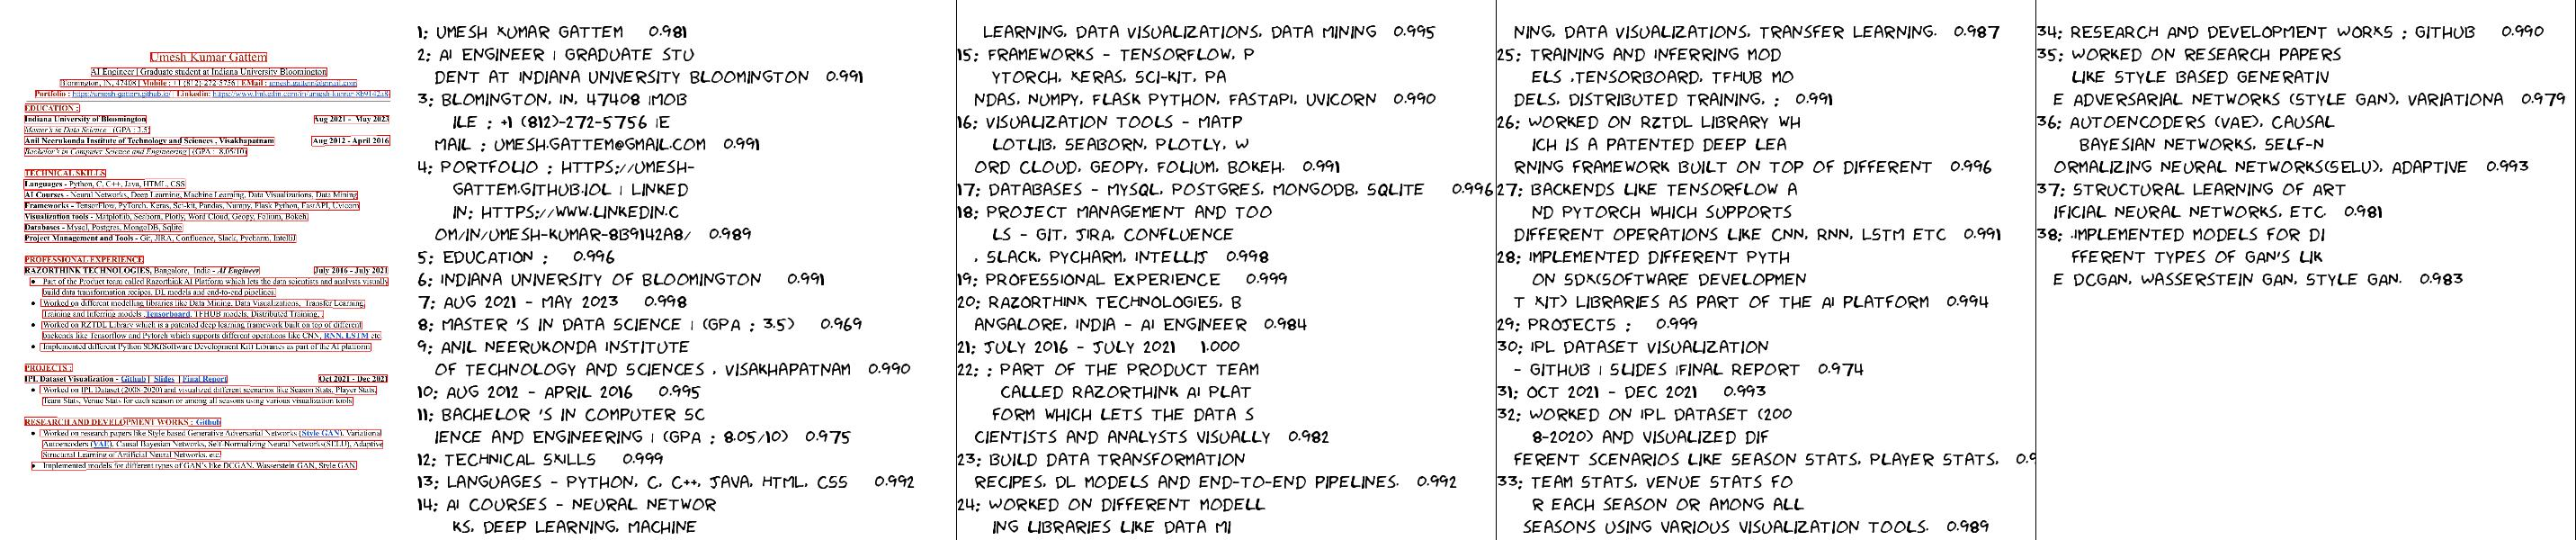

In [18]:
img = cv2.imread('/content/result.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

From above I can see that paddleocr has extracted text from the resume so accurately.

Let's check the other way of extracting text. It is one of the famous library. Teserract Engine is being used by many libraries internally

## Teserract Model 

Tesseract is an Optical Character Recognition Engine for various operating system.

To get acess to this engine in our operating system we need to install the following module in out system.

To install tesseract engine in our machine we need to run the following module based on the system environment.

#### For Linux/Ubuntu environment:

```python
sudo apt-get install tesseract-ocr
```

#### For MacOS environment:

For macOS users, we’ll be using Homebrew to install Tesseract
```python
brew install tesseract
```
If you just want to update tesseract without updating any other bre components. Use the following command.

```python
HOMEBREW_NO_AUTO_UPDATE=1 brew install tesseract
```

Once we install the above commands based on our environment, we will have access to tesseract engine in our machine. Also we need one of the Python library "Pytesseract" to run the tesseract model which we already installed through our requirements.txt.

Tesseract used the power of OCR with AI to capture data from structured and unstructured data. This module extracts text from images and documents without a text layer and outputs the document into a new searchable text file, PDF, or most other popular formats.

Like PaddleOCR, Tesseract model is also a light weight and can be run with or without GPU. Also, Tesseract give the extra abilities to predict the images from the BLUR background or the bright background.


In [19]:
!pip3 install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Now import all necessary modules

In [21]:
from PIL import Image
import pytesseract
import argparse
from google.colab.patches import cv2_imshow
import os
from PIL import Image, ImageDraw

In [22]:
from pathlib import Path

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
ls "/content/drive/MyDrive/IUB Fall 22/Advance NLP/Project/data"


others/  resume_images/  wantok_images/


In [24]:
file_path = "/content/drive/MyDrive/IUB Fall 22/Advance NLP/Project/data"


In [25]:
images_path = list(Path(file_path + "/wantok_images").glob("*"))

image = Image.open(images_path[0])

Once we load the data we can directly run the pyteserract API on the image

In [26]:

preprocess = None


image = cv2.imread(str(images_path[0]))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# check to see if we should apply thresholding to preprocess the
# image
if preprocess == "thresh":
	gray = cv2.threshold(gray, 0, 255,
		cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# make a check to see if median blurring should be done to remove
# noise
elif preprocess == "blur":
	gray = cv2.medianBlur(gray, 3)
# write the grayscale image to disk as a temporary file so we can
# apply OCR to it
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)


# load the image as a PIL/Pillow image, apply OCR, and then delete
# the temporary file
predicted_text = pytesseract.image_to_string(Image.open(filename))
os.remove(filename)
print(predicted_text)


 

 

 

  

  
  
 

   

Long yia 1968 dispela Visiting
Misin bilong Yunaitet Nesens i
kamap long Niugini. Hia ol i stap
long Rabaul long taim bilong ilek-
sen. Nem bilong ol em hia (kirap
long lephan): Mista A. V. Caine
(Liberia), Mista J.M. McEwan (Nu
Silan), Mista W. Allen (Amerika),
na Mista P. Gaschignard (Frans).
( D.I.E.S.poto )

   
  
  
  
  
 

   

 

Trinde, Mas 3, 1971

©1 memba bilong lain bilong Yunaitet Nesens i kam
lukluk raun long Teritori long yia 1965. Em hia ol
i stap long Kompian. 01 memba i sindaun i stap (ki-
rap long lephan): Mista Dermot J.
Andre Naudy (Frans), Dwight Dickinson (Amerika),
Nathaniel Eastman (Liberia). (Yunaitet Nesens poto)

Swan (Englan),

01 memba bilong 1971 Visiting Misin bilong Yu-
naitet Nesens i bung insait long
bus long Isten Hailans. Em ol hia
lephan}: Sir Denis Allen (Englan), Mista Paul
Blanc (Frans), na Mista Adnam Raouf (Irak)

( D.I.E.S. poto )

 

  

      
 
   
 
 
  

wanpela haus
(kirap long

 

 



From above output cell, we can see the extracted text.

### Conclusion:

I am trying to extract the text from the wantok images using different ways. Actuallt I have worked on one more method of extractig text which is Google Cloud. I have inserted that code in the github and you can find that from [Google Cloud API](https://github.com/umesh-gattem/OCR_NLP_Project/blob/master/GoogleAPI/google_cloud_text_recognition.py).

Also you can find the above methods of python version in the [Github](https://github.com/umesh-gattem/OCR_NLP_Project).


Also I have planned to do two more things on this project which are Evaluating metrics and fine tuning the Layout Language Model. But I couldn't get the labels of the current dataset. So currently I am not able to do that but for sure I am going to generate some ground truth labels and perform some evaluationa and fine tune the model to get better results
